In [1]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout


In [2]:
from matplotlib import pyplot as plt

In [3]:
(trainX, trainy), (testX, testy) = load_data()


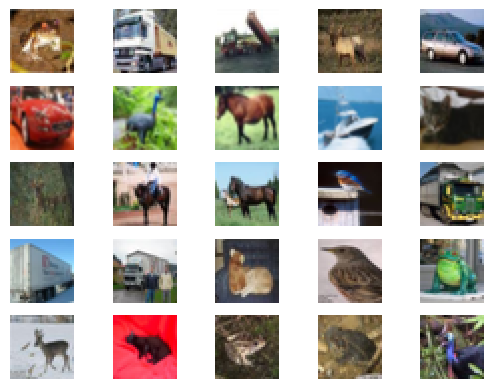

In [4]:
for i in range(25):
	plt.subplot(5, 5, 1 + i)
	plt.axis('off')
	plt.imshow(trainX[i])
plt.show()


In [6]:
def define_discriminator(in_shape=(32,32,3)):
    model = Sequential()
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape)) #16x16x128
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same')) #8x8x128
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten()) #shape of 8192
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid')) #shape of 1
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

test_discr = define_discriminator()
print(test_discr.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,361 (622.50 KB)

 Trainable params: 159,361 (622.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 8 * 8 
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (8, 8), activation='tanh', padding='same'))
    return model


In [8]:
test_gen = define_generator(100)
print(test_gen.summary())


/Users/nishantarora/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8192)           │       827,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │        24,579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376,515 (5.25 MB)

 Trainable params: 1,376,515 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model


In [12]:
def load_real_samples():
    (trainX, _), (_, _) = load_data()
    X = trainX.astype('float32')
    X = (X - 127.5) / 127.5
    return X

def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y


In [37]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss_real = d_model.train_on_batch(X_real, y_real)[0]  # Extract the first element (loss value)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss_fake = d_model.train_on_batch(X_fake, y_fake)[0]  # Extract the first element (loss value)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)[0]  # Extract the first element (loss value)
            
            # Print the losses
            print('Epoch>%d, Batch %d/%d, d1=%.3f, d2=%.3f, g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss_real, d_loss_fake, g_loss))
    g_model.save('cifar_generator_2epochs.h5')


In [35]:

latent_dim = 100


discriminator = define_discriminator()


generator = define_generator(latent_dim)

gan_model = define_gan(generator, discriminator)

dataset = load_real_samples()

train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch>1, Batch 1/390, d1=0.680, d2=0.687, g=0.687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch>1, Batch 2/390, d1=0.686, d2=0.690, g=0.690
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch>1, Batch 3/390, d1=0.686, d2=0.690, g=0.690
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch>1, Batch 4/390, d1=0.688, d2=0.691, g=0.691
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch>1, Batch 5/390, d1=0.691, d2=0.694, g=0.694
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch>1, Batch 6/390, d1=0.693, d2=0.696, g=0.696
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch>1, Batch 7/390, d1=0.694, d2=0.699, g=0.699
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch>1, Batch 8/390, d1=0.697, d2=0.702, g=0.702
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch>1, Batch 9/390, d1=0.700, d2=0.706, g=0.706
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch>1, Batch 10/390, d1=0.705, d2=0.711, g=0.711
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Epoch>1, Batch 11/390, d1=0.709, d2=0.716, g=0.716
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49

Epoch>2, Batch 390/390, d1=1.205, d2=1.205, g=1.205


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


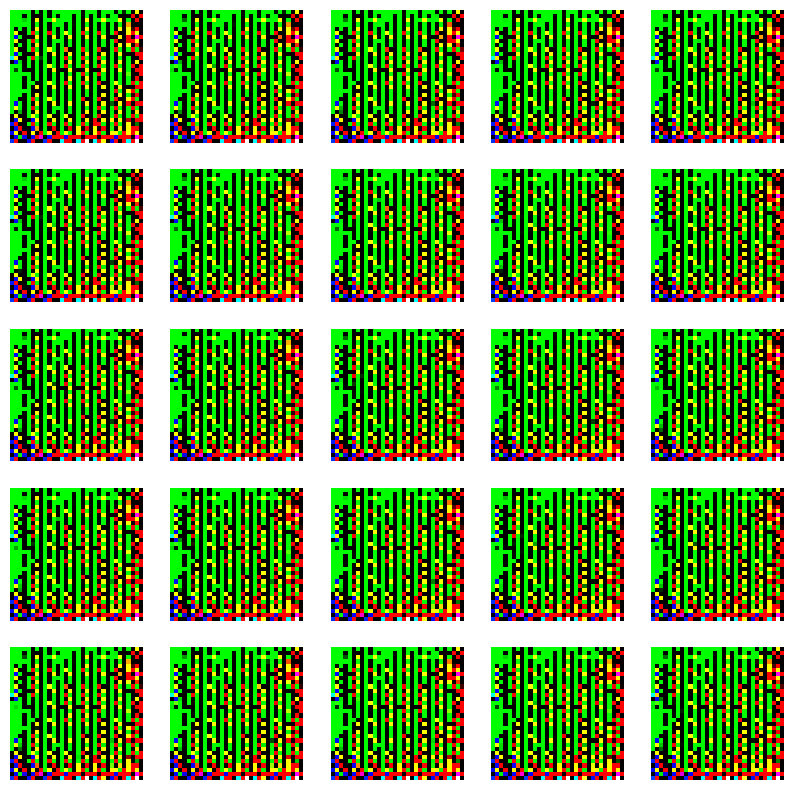

In [40]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('cifar_generator_2epochs.h5')

def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def show_plot(examples, n):
    plt.figure(figsize=(10, 10))
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i])
    plt.show()

latent_dim = 100
latent_points = generate_latent_points(latent_dim, 25)
X = model.predict(latent_points)
X = (X + 1) / 2.0
X = (X * 255).astype(np.uint8)
show_plot(X, 5)
